# AMOCarray demo

The purpose of this notebook is to demonstrate the functionality of `AMOCarray`.

The demo is organised to show

- Step 1: Loading and plotting a sample dataset

- Step 2: Exploring the dataset attributes and variables.

Note that when you submit a pull request, you should `clear all outputs` from your python notebook for a cleaner merge.


In [1]:
import pathlib
import sys

script_dir = pathlib.Path().parent.absolute()
parent_dir = script_dir.parents[0]
sys.path.append(str(parent_dir))

import importlib

import xarray as xr
import os
from amocarray import readers, plotters, standardise, utilities

In [2]:
# Specify the path for writing datafiles
data_path = os.path.join(parent_dir, "data")

### Load RAPID 26°N

In [3]:
importlib.reload(standardise)
importlib.reload(utilities)
# Load data from data/moc_transports
#ds_rapid = readers.load_sample_dataset()
#ds_rapid = standardise.standardise_rapid(ds_rapid, ds_rapid.attrs["source_file"])
datasets = readers.load_dataset("rapid", transport_only=True)
standardised = [
    standardise.standardise_rapid(ds, ds.attrs["source_file"])
    for ds in datasets
]
ds_rapid = standardised[0]
#ds_rapid = standardised[2]


20250418T082859 INFO     setup_logger Logger initialized for array: rapid, writing to /Users/eddifying/Cloudfree/gitlab-cloudfree/amocarray/logs/RAPID_20250418T08_read.log
20250418T082859 INFO     load_dataset Loading dataset for array: rapid
20250418T082859 INFO     read_rapid Starting to read RAPID dataset
20250418T082859 INFO     resolve_file_path Using cached file: /Users/eddifying/Cloudfree/gitlab-cloudfree/amocarray/data/moc_transports.nc
20250418T082859 INFO     read_rapid Opening RAPID dataset: /Users/eddifying/Cloudfree/gitlab-cloudfree/amocarray/data/moc_transports.nc
20250418T082859 INFO     read_rapid Attaching metadata to RAPID dataset from file: moc_transports.nc
20250418T082859 INFO     read_rapid Successfully loaded 1 RAPID dataset(s)
20250418T082859 INFO     load_dataset Successfully loaded 1 dataset(s) for array: rapid
20250418T082859 INFO     _summarise_datasets 
Summary for array 'rapid':
Total datasets loaded: 1

Dataset 1:
  Source file: moc_transports.nc
  Time c

Summary for array 'rapid':
Total datasets loaded: 1

Dataset 1:
  Source file: moc_transports.nc
  Time coverage: TIME variable not found
  Dimensions:
    - time: 13779
  Variables:
    - t_therm10: shape (13779,)
    - t_aiw10: shape (13779,)
    - t_ud10: shape (13779,)
    - t_ld10: shape (13779,)
    - t_bw10: shape (13779,)
    - t_gs10: shape (13779,)
    - t_ek10: shape (13779,)
    - t_umo10: shape (13779,)
    - moc_mar_hc10: shape (13779,)



In [4]:
ds_rapid

<xarray.Dataset> Size: 1MB
Dimensions:       (TIME: 13779)
Coordinates:
  * TIME          (TIME) datetime64[ns] 110kB 2004-04-02 ... 2023-02-11
Data variables:
    t_therm10     (TIME) float64 110kB ...
    t_aiw10       (TIME) float64 110kB ...
    t_ud10        (TIME) float64 110kB ...
    t_ld10        (TIME) float64 110kB ...
    t_bw10        (TIME) float64 110kB ...
    t_gs10        (TIME) float64 110kB ...
    t_ek10        (TIME) float64 110kB ...
    t_umo10       (TIME) float64 110kB ...
    moc_mar_hc10  (TIME) float64 110kB ...
Attributes: (12/27)
    title:                                      RAPID MOC timeseries
    platform:                                   mooring
    platform_vocabulary:                        https://vocab.nerc.ac.uk/coll...
    time_coverage_start:                        2004-04-01
    time_coverage_end:                          2023-12-31
    project:                                    RAPID-AMOC 26°N array
    ...                                         ...
    data_product:                               RAPID layer transport time se...
    array_name:                                 RAPID
    license:                                    CC-BY 4.0
    metadata_conventions:                       CF-1.8, ACDD-1.3
    creator_url:                                https://rapid.ac.uk/
    summary:                                    RAPID 26N transport estimates...

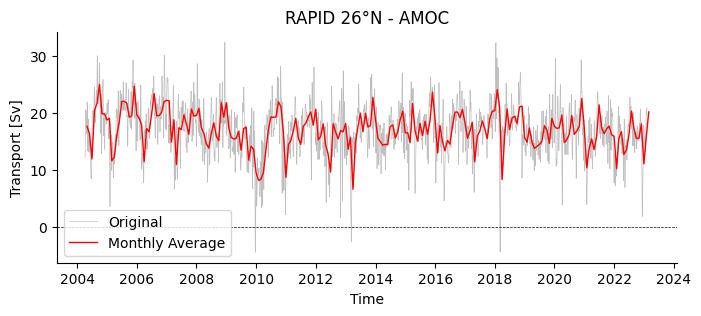

In [5]:
import matplotlib.pyplot as plt

# Resample the dataset to monthly averages
ds_monthly = ds_rapid.resample(TIME="ME").mean()

# Initialize the figure and axes with a specific figure size
fig, axes = plt.subplots(figsize=(8, 3))

# Plot the original dataset in thin grey
plt.plot(
    ds_rapid["TIME"],
    ds_rapid["moc_mar_hc10"],
    color="grey",
    alpha=0.5,
    linewidth=0.5,
    label="Original",
)

# Plot the monthly averaged dataset in thick red
plt.plot(
    ds_monthly["TIME"],
    ds_monthly["moc_mar_hc10"],
    color="red",
    linewidth=1,
    label="Monthly Average",
)

# Add a horizontal line at y=0
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Customize the axes
axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)

# Add title and labels
plt.title("RAPID 26°N - AMOC")
plt.xlabel("Time")
plt.ylabel("Transport [Sv]")
plt.legend()

### Load MOVE 16°N

In [6]:
datasets16 = readers.load_dataset("move")
ds_move = datasets16[0]
ds_move

20250418T082859 INFO     setup_logger Logger initialized for array: move, writing to /Users/eddifying/Cloudfree/gitlab-cloudfree/amocarray/logs/MOVE_20250418T08_read.log
20250418T082859 INFO     load_dataset Loading dataset for array: move
20250418T082859 INFO     read_move Starting to read MOVE dataset
20250418T082859 INFO     resolve_file_path Using cached file: /Users/eddifying/Cloudfree/gitlab-cloudfree/amocarray/data/OS_MOVE_TRANSPORTS.nc
20250418T082859 INFO     read_move Opening MOVE dataset: /Users/eddifying/Cloudfree/gitlab-cloudfree/amocarray/data/OS_MOVE_TRANSPORTS.nc
20250418T082859 INFO     read_move Attaching metadata to dataset from file: OS_MOVE_TRANSPORTS.nc
20250418T082859 DEBUG    safe_update_attrs Attribute 'project' already exists in dataset attrs and will not be overwritten.
20250418T082859 DEBUG    safe_update_attrs Attribute 'comment' already exists in dataset attrs and will not be overwritten.
20250418T082859 DEBUG    safe_update_attrs Attribute 'acknowledgemen

Summary for array 'move':
Total datasets loaded: 1

Dataset 1:
  Source file: OS_MOVE_TRANSPORTS.nc
  Time coverage: 2000-01-01 to 2018-06-30
  Dimensions:
    - TIME: 6756
  Variables:
    - TRANSPORT_TOTAL: shape (6756,)
    - transport_component_internal: shape (6756,)
    - transport_component_internal_offset: shape (6756,)
    - transport_component_boundary: shape (6756,)



<xarray.Dataset> Size: 270kB
Dimensions:                              (TIME: 6756)
Coordinates:
  * TIME                                 (TIME) datetime64[ns] 54kB 2000-01-0...
Data variables:
    TRANSPORT_TOTAL                      (TIME) float64 54kB ...
    transport_component_internal         (TIME) float64 54kB ...
    transport_component_internal_offset  (TIME) float64 54kB ...
    transport_component_boundary         (TIME) float64 54kB ...
Attributes: (12/21)
    Conventions:       CF-1.7,ACDD-1.3
    title:             Ocean Volume Transport Data from the MOVE Mooring Obse...
    summary:           The Meridional Overturning Variability Experiment (MOV...
    date_created:      2019-01-30T18:13:16Z
    creator_name:      Matthias Lankhorst
    creator_url:       http://orcid.org/0000-0002-4166-4044
    ...                ...
    source:            Derived using the following files:\n  OceanSITES file ...
    source_file:       OS_MOVE_TRANSPORTS.nc
    source_path:       /Users/eddifying/Cloudfree/gitlab-cloudfree/amocarray/...
    description:       MOVE transport estimates dataset from UCSD mooring pro...
    weblink:           https://mooring.ucsd.edu/move/
    data_product:      MOVE transport time series

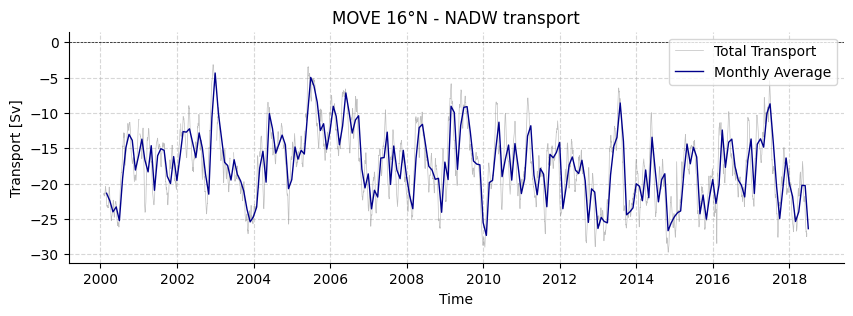

In [7]:
# Resample the dataset to monthly averages
ds_monthly = ds_move.resample(TIME="ME").mean()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 3))

# Plot the total transport from the MOVE dataset in thin grey
ax.plot(
    ds_move["TIME"],
    ds_move["TRANSPORT_TOTAL"],
    color="grey",
    alpha=0.5,
    linewidth=0.5,
    label="Total Transport",
)

# Plot the monthly averaged dataset in thick red
ax.plot(
    ds_monthly["TIME"],
    ds_monthly["TRANSPORT_TOTAL"],
    color="darkblue",
    linewidth=1,
    label="Monthly Average",
)
# Add a horizontal line at y=0
ax.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Customize the axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add labels, title, and legend
ax.set_title("MOVE 16°N - NADW transport")
ax.set_xlabel("Time")
ax.set_ylabel("Transport [Sv]")
ax.legend()

# Customize the grid
ax.grid(True, linestyle="--", alpha=0.5)

### Load OSNAP

In [8]:
datasetsOSNAP = readers.load_dataset("osnap")
ds_osnap = datasetsOSNAP[0]
plotters.show_variables(ds_osnap)
ds_osnap

20250418T082900 INFO     setup_logger Logger initialized for array: osnap, writing to /Users/eddifying/Cloudfree/gitlab-cloudfree/amocarray/logs/OSNAP_20250418T08_read.log
20250418T082900 INFO     load_dataset Loading dataset for array: osnap
20250418T082900 INFO     read_osnap Starting to read OSNAP dataset
20250418T082900 INFO     resolve_file_path Downloading file from https://repository.gatech.edu/bitstreams/e039e311-dd2e-4511-a525-c2fcfb3be85a/download to /Users/eddifying/Cloudfree/gitlab-cloudfree/amocarray/data
20250418T082900 INFO     read_osnap Opening OSNAP dataset: /Users/eddifying/Cloudfree/gitlab-cloudfree/amocarray/data/download
20250418T082900 INFO     read_osnap Attaching metadata to dataset from file: OSNAP_MOC_MHT_MFT_TimeSeries_201408_202006_2023.nc
20250418T082900 DEBUG    safe_update_attrs Attribute 'project' already exists in dataset attrs and will not be overwritten.
20250418T082900 INFO     read_osnap Successfully loaded 1 OSNAP dataset(s)
20250418T082900 INFO  

Summary for array 'osnap':
Total datasets loaded: 1

Dataset 1:
  Source file: OSNAP_MOC_MHT_MFT_TimeSeries_201408_202006_2023.nc
  Time coverage: 2014-08-01 to 2020-06-01
  Dimensions:
    - TIME: 71
  Variables:
    - MOC_ALL: shape (71,)
    - MOC_ALL_ERR: shape (71,)
    - MOC_EAST: shape (71,)
    - MOC_EAST_ERR: shape (71,)
    - MOC_WEST: shape (71,)
    - MOC_WEST_ERR: shape (71,)
    - MHT_ALL: shape (71,)
    - MHT_ALL_ERR: shape (71,)
    - MHT_EAST: shape (71,)
    - MHT_EAST_ERR: shape (71,)
    - MHT_WEST: shape (71,)
    - MHT_WEST_ERR: shape (71,)
    - MFT_ALL: shape (71,)
    - MFT_ALL_ERR: shape (71,)
    - MFT_EAST: shape (71,)
    - MFT_EAST_ERR: shape (71,)
    - MFT_WEST: shape (71,)
    - MFT_WEST_ERR: shape (71,)

information is based on xarray Dataset


<xarray.Dataset> Size: 11kB
Dimensions:       (TIME: 71)
Coordinates:
  * TIME          (TIME) datetime64[ns] 568B 2014-08-01T12:00:00 ... 2020-06-...
Data variables: (12/18)
    MOC_ALL       (TIME) float64 568B 15.38 10.17 19.14 ... 19.56 26.41 24.0
    MOC_ALL_ERR   (TIME) float64 568B 4.168 3.247 4.398 ... 3.954 4.558 4.083
    MOC_EAST      (TIME) float64 568B 13.91 11.44 16.79 ... 18.61 22.89 22.62
    MOC_EAST_ERR  (TIME) float64 568B 3.647 2.324 3.898 ... 3.66 4.104 3.902
    MOC_WEST      (TIME) float64 568B 3.624 1.884 3.141 ... 4.277 4.773 3.212
    MOC_WEST_ERR  (TIME) float64 568B 1.284 1.2 1.377 1.757 ... 2.064 1.82 1.36
    ...            ...
    MFT_ALL       (TIME) float64 568B -0.3471 -0.3343 ... -0.2993 -0.3861
    MFT_ALL_ERR   (TIME) float64 568B 0.05285 0.04691 0.05658 ... 0.0499 0.04783
    MFT_EAST      (TIME) float64 568B -0.177 -0.1197 -0.247 ... -0.209 -0.2548
    MFT_EAST_ERR  (TIME) float64 568B 0.05111 0.0441 0.0548 ... 0.04563 0.04057
    MFT_WEST      (TIME) float64 568B -0.1701 -0.2146 ... -0.09034 -0.1313
    MFT_WEST_ERR  (TIME) float64 568B 0.0134 0.01505 0.01457 ... 0.02287 0.02031
Attributes: (12/20)
    title:                    OSNAP MOC MHT MFT time series (2014-2020)
    project:                  OSNAP
    contributor_name:         Yao Fu, M. Susan Lozier, Tiago Carrilho Biló, A...
    contributor_role:         data design, collection and/or processing
    contributor_institution:  Georgia Institute of Technology, USA; National ...
    publisher_name:           M. Susan Lozier; Yao Fu
    ...                       ...
    source_path:              /Users/eddifying/Cloudfree/gitlab-cloudfree/amo...
    weblink:                  https://www.o-snap.org
    comment:                  Dataset accessed and processed via http://githu...
    acknowledgement:          OSNAP data were collected and made freely avail...
    doi:                      https://doi.org/10.35090/gatech/70342
    data_product:             Time series of MOC, MHT, and MFT

### Load SAMBA 34.5°S

In [9]:
datasets34S = readers.load_dataset("SAMBA")
standardised_datasets = [
    standardise.standardise_samba(ds, ds.attrs["source_file"]) for ds in datasets34S
]

20250418T082900 INFO     setup_logger Logger initialized for array: SAMBA, writing to /Users/eddifying/Cloudfree/gitlab-cloudfree/amocarray/logs/SAMBA_20250418T08_read.log
20250418T082900 INFO     load_dataset Loading dataset for array: SAMBA
20250418T082900 INFO     read_samba Starting to read SAMBA dataset
20250418T082900 INFO     resolve_file_path Using cached file: /Users/eddifying/Cloudfree/gitlab-cloudfree/amocarray/data/Upper_Abyssal_Transport_Anomalies.txt
20250418T082900 INFO     read_samba Attaching metadata to SAMBA dataset from file: Upper_Abyssal_Transport_Anomalies.txt
20250418T082900 INFO     resolve_file_path Using cached file: /Users/eddifying/Cloudfree/gitlab-cloudfree/amocarray/data/MOC_TotalAnomaly_and_constituents.asc
20250418T082900 INFO     read_samba Attaching metadata to SAMBA dataset from file: MOC_TotalAnomaly_and_constituents.asc
20250418T082900 INFO     read_samba Successfully loaded 2 SAMBA dataset(s)
20250418T082900 INFO     load_dataset Successfully load

Summary for array 'SAMBA':
Total datasets loaded: 2

Dataset 1:
  Source file: Upper_Abyssal_Transport_Anomalies.txt
  Time coverage: 2013-09-12 to 2017-07-16
  Dimensions:
    - TIME: 1404
  Variables:
    - Upper-cell volume transport anomaly (relative to record-length average of 17.3 Sv): shape (1404,)
    - Abyssal-cell volume transport anomaly (relative to record-length average of 7.8 Sv): shape (1404,)

Dataset 2:
  Source file: MOC_TotalAnomaly_and_constituents.asc
  Time coverage: 2009-03-19 to 2017-04-29
  Dimensions:
    - TIME: 2964
  Variables:
    - Total MOC anomaly (relative to record-length average of 14.7 Sv): shape (2964,)
    - Relative (density gradient) contribution to the MOC anomaly: shape (2964,)
    - Reference (bottom pressure gradient) contribution to the MOC anomaly: shape (2964,)
    - Ekman (wind) contribution to the MOC anomaly: shape (2964,)
    - Western density contribution to the MOC anomaly: shape (2964,)
    - Eastern density contribution to the MOC

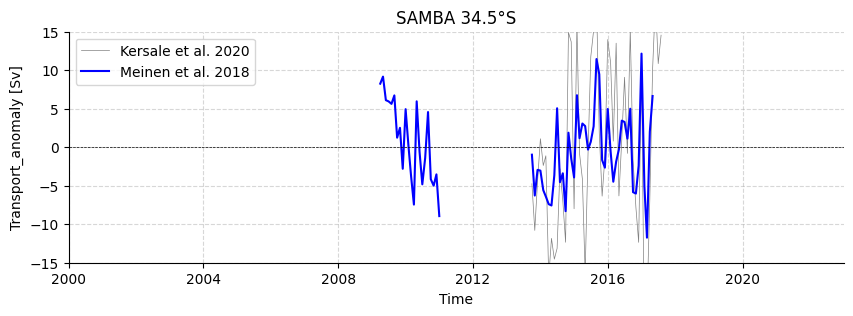

In [10]:
# Extract the upper and abyssal transport data
ds = standardised_datasets[0]
upper_transport = ds["UPPER_TRANSPORT"]
ds2 = standardised_datasets[1]
moc_meinen = ds2["MOC"]


# Resample the dataset to monthly averages
upper_transport_monthly = upper_transport.resample(TIME="ME").mean()
moc_meinen_monthly = moc_meinen.resample(TIME="ME").mean()
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 3))

# Plot the original upper transport in thin blue
ax.plot(
    upper_transport_monthly["TIME"],
    upper_transport_monthly,
    color="grey",
    linewidth=0.5,
    label="Kersale et al. 2020",
)
ax.plot(
    moc_meinen_monthly["TIME"],
    moc_meinen_monthly,
    color="blue",
    alpha=1,
    linewidth=1.5,
    label="Meinen et al. 2018",
)


# Add a horizontal line at y=0
ax.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Customize the axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add labels, title, and legend
ax.set_title("SAMBA 34.5°S")
ax.set_xlabel("Time")
ax.set_ylabel(
    f"{upper_transport.attrs['standard_name']} [{upper_transport.attrs['units']}]"
)
ax.legend()
# Set the x-axis limits from 2000 to 2022
import pandas as pd

ax.set_xlim([pd.Timestamp("2000-01-01"), pd.Timestamp("2022-12-31")])

# Set the y-axis limits from -15 to 15
ax.set_ylim([-15, 15])

# Customize the grid
ax.grid(True, linestyle="--", alpha=0.5)

In [11]:
ds2

<xarray.Dataset> Size: 213kB
Dimensions:               (TIME: 2964)
Coordinates:
  * TIME                  (TIME) datetime64[ns] 24kB 2009-03-19T12:00:00 ... ...
Data variables:
    MOC                   (TIME) float64 24kB -6.76 2.81 6.41 ... 24.12 27.38
    RELATIVE_MOC          (TIME) float64 24kB 4.24 7.59 9.1 ... 16.51 15.15
    BAROTROPIC_MOC        (TIME) float64 24kB -6.7 -0.69 1.6 ... 4.34 6.72 7.87
    EKMAN                 (TIME) float64 24kB -4.34 -3.83 -3.98 ... 0.7 4.12
    WESTERN_DENSITY       (TIME) float64 24kB -2.99 -1.22 0.91 ... 4.24 3.22
    EASTERN_DENSITY       (TIME) float64 24kB 7.14 8.81 8.2 ... 12.27 11.89
    WESTERN_BOT_PRESSURE  (TIME) float64 24kB -4.74 2.18 5.14 ... 1.57 2.93 4.21
    EASTERN_BOT_PRESSURE  (TIME) float64 24kB -1.68 -3.03 -3.96 ... 4.06 3.97
Attributes: (12/16)
    platform:              mooring
    platform_vocabulary:   https://vocab.nerc.ac.uk/collection/L06/
    time_coverage_start:   2001-06-01
    time_coverage_end:     2023-12-31
    project:               South Atlantic MOC Basin-wide Array (SAMBA)
    web_link:              https://www.aoml.noaa.gov/phod/samoc
    ...                    ...
    acknowledgement:       Meinen, C. S., Speich, S., Piola, A. R., Ansorge, ...
    data_product:          Daily travel time values, calibrated to a nominal ...
    array_name:            SAMBA
    license:               CC-BY 4.0
    metadata_conventions:  CF-1.8, ACDD-1.3
    summary:               SAMBA 34S transport estimates dataset

(<Figure size 600x800 with 4 Axes>,
 array([<Axes: title={'center': 'OSNAP'}, ylabel='Transport [Sv]'>,
        <Axes: title={'center': 'RAPID 26°N'}, ylabel='Transport [Sv]'>,
        <Axes: title={'center': 'MOVE 16°N'}, ylabel='Transport [Sv]'>,
        <Axes: title={'center': 'SAMBA 34.5°S'}, xlabel='Time', ylabel='Transport [Sv]'>],
       dtype=object))

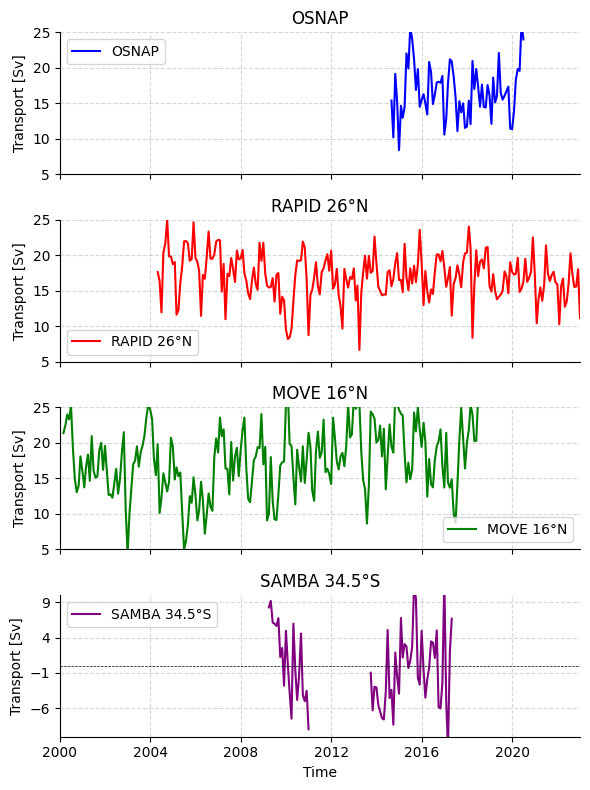

In [12]:
importlib.reload(plotters)
plotters.plot_monthly_anomalies(
    osnap_data=ds_osnap["MOC_ALL"],
    rapid_data=ds_rapid["moc_mar_hc10"],
    move_data=-ds_move["TRANSPORT_TOTAL"],
    samba_data=standardised_datasets[1]["MOC"],
    osnap_label="OSNAP",
    rapid_label="RAPID 26°N",
    move_label="MOVE 16°N",
    samba_label="SAMBA 34.5°S",
)